Use the World Bank API to:

Fetch population data by country

Store and query it via SQLite

Calculate probability of being born in a specific country or region

Visualize insights

In [34]:
import wbgapi as wb
import pandas as pd
import pprint

# Fetch population data for all countries (most recent value)
df = wb.data.DataFrame('SP.POP.TOTL',time=2022,labels=True,).reset_index()

df = df[['Country','SP.POP.TOTL']]
df.columns = ['country_name','population']
pprint.pprint(df.head())


            country_name  population
0               Zimbabwe  16069056.0
1                 Zambia  20152938.0
2            Yemen, Rep.  38222876.0
3     West Bank and Gaza   5043612.0
4  Virgin Islands (U.S.)    105413.0


In [35]:
import sqlite3

conn = sqlite3.connect("wb_population.db")
df.to_sql("countries", conn, if_exists="replace", index=False)
pprint.pprint(conn.execute('SELECT * FROM countries LIMIT 5').fetchall())
pprint.pprint(conn.execute('PRAGMA TABLE_INFO("countries")').fetchall())

[('Zimbabwe', 16069056.0),
 ('Zambia', 20152938.0),
 ('Yemen, Rep.', 38222876.0),
 ('West Bank and Gaza', 5043612.0),
 ('Virgin Islands (U.S.)', 105413.0)]
[(0, 'country_name', 'TEXT', 0, None, 0), (1, 'population', 'REAL', 0, None, 0)]


In [36]:
query = "SELECT country_name, population FROM countries"
df_sql = pd.read_sql_query(query, conn)

total_population = df_sql['population'].sum()
print(f'total population: {total_population}')
canada_population = df_sql[df_sql['country_name'] == 'Canada']['population'].values[0]
print(f'Canada population: {canada_population}')

probability_canada = canada_population / total_population
average_population = df_sql['population'].mean()
canada_vs_average = canada_population / average_population
print(f'World average population: {average_population}')
print(f"Canada_vs_average: {canada_vs_average}")


total population: 86158208225.0
Canada population: 38935934.0
World average population: 325125314.0566038
Canada_vs_average: 0.11975669785349694


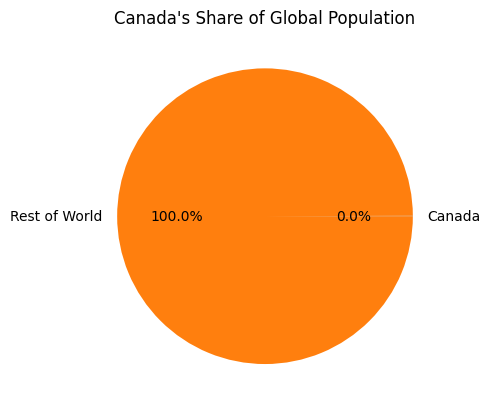

🌍 Total World Population: 86158208225.0
🇨🇦 Canada's Population: 38935934.0
🧮 Probability of being born in Canada: 0.0005
📊 Average Country Population: 325125314
📏 Canada vs Average: 0.12 times larger


In [37]:
import matplotlib.pyplot as plt

rest_of_world = total_population - canada_population
labels = ['Canada', 'Rest of World']
sizes = [canada_population, rest_of_world]

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("Canada's Share of Global Population")
plt.show()
print("🌍 Total World Population:", total_population)
print("🇨🇦 Canada's Population:", canada_population)
print("🧮 Probability of being born in Canada:", round(probability_canada, 4))
print("📊 Average Country Population:", round(average_population))
print("📏 Canada vs Average:", round(canada_vs_average, 2), "times larger")
